In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'combined.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame and summary information
first_rows = data.head()
summary = data.describe(include='all')

first_rows, summary

(  ticker      open      high       low     close        volume     marketCap  \
 0    GRT  0.081321  0.095613  0.081194  0.087016  9.426104e+07  6.004090e+08   
 1    GRT  0.094877  0.104187  0.094869  0.098473  1.037525e+08  6.794642e+08   
 2    GRT  0.090396  0.092554  0.087186  0.090509  4.967545e+07  6.245098e+08   
 3    GRT  0.075498  0.076658  0.057292  0.058114  7.946599e+07  4.009863e+08   
 4    GRT  0.069620  0.070350  0.063648  0.065879  3.178386e+07  4.545682e+08   
 
                   timestamp  
 0  2022-11-03T00:00:00.000Z  
 1  2022-11-05T00:00:00.000Z  
 2  2022-11-07T00:00:00.000Z  
 3  2022-11-09T00:00:00.000Z  
 4  2022-11-11T00:00:00.000Z  ,
        ticker          open          high           low         close  \
 count   33756  3.375600e+04  3.375600e+04  3.375600e+04  3.375600e+04   
 unique    186           NaN           NaN           NaN           NaN   
 top      MNGO           NaN           NaN           NaN           NaN   
 freq      364           NaN 

### Let's start with step 1A: Identifying the top 20 tickers by market cap and showing the performance of a $100 investment over the last year.

In [3]:
from datetime import datetime, timedelta

# Convert timestamp to datetime for easier manipulation
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Filter data for the last one year
one_year_ago = data['timestamp'].max() - timedelta(days=365)
data_last_year = data[data['timestamp'] > one_year_ago]

# We need to identify the latest market cap for each ticker
latest_market_cap = data_last_year.groupby('ticker')['marketCap'].last()

# Now we take the top 20 tickers by market cap
top_20_market_cap_tickers = latest_market_cap.nlargest(20).index

# Filter the data to include only the top 20 tickers
top_20_data = data_last_year[data_last_year['ticker'].isin(top_20_market_cap_tickers)]

# Now we will calculate the performance of a $100 investment in each ticker
# We will create a pivot table with dates as the index and tickers as the columns, with the adjusted close prices
pivot_prices = top_20_data.pivot(index='timestamp', columns='ticker', values='close')

# Calculate the initial price for each ticker (first available price in the last year)
initial_prices = pivot_prices.iloc[0]

# Calculate the investment performance ($100 / initial price * price for each day)
investment_performance = 100 / initial_prices * pivot_prices

investment_performance.head(), initial_prices, top_20_market_cap_tickers


(ticker                            APT        ATOM        AVAX         CRO  \
 timestamp                                                                   
 2022-11-03 00:00:00+00:00  100.000000  100.000000  100.000000  100.000000   
 2022-11-05 00:00:00+00:00  105.553834  113.981746  108.619357  109.767143   
 2022-11-07 00:00:00+00:00   96.738761  105.621243  100.115054  112.507341   
 2022-11-09 00:00:00+00:00   54.442816   72.476777   71.576471   73.157479   
 2022-11-11 00:00:00+00:00   71.047124   86.261674   78.101811   78.166265   
 
 ticker                            DAI         DOT         FIL        HBAR  \
 timestamp                                                                   
 2022-11-03 00:00:00+00:00  100.000000  100.000000  100.000000  100.000000   
 2022-11-05 00:00:00+00:00   99.988303  109.247119  106.600078  103.815056   
 2022-11-07 00:00:00+00:00  100.011101  110.838692   99.255064   98.842772   
 2022-11-09 00:00:00+00:00  100.003542   84.251049   71.720485

### Now, let's plot the performance of these $100 investments in a line chart.​

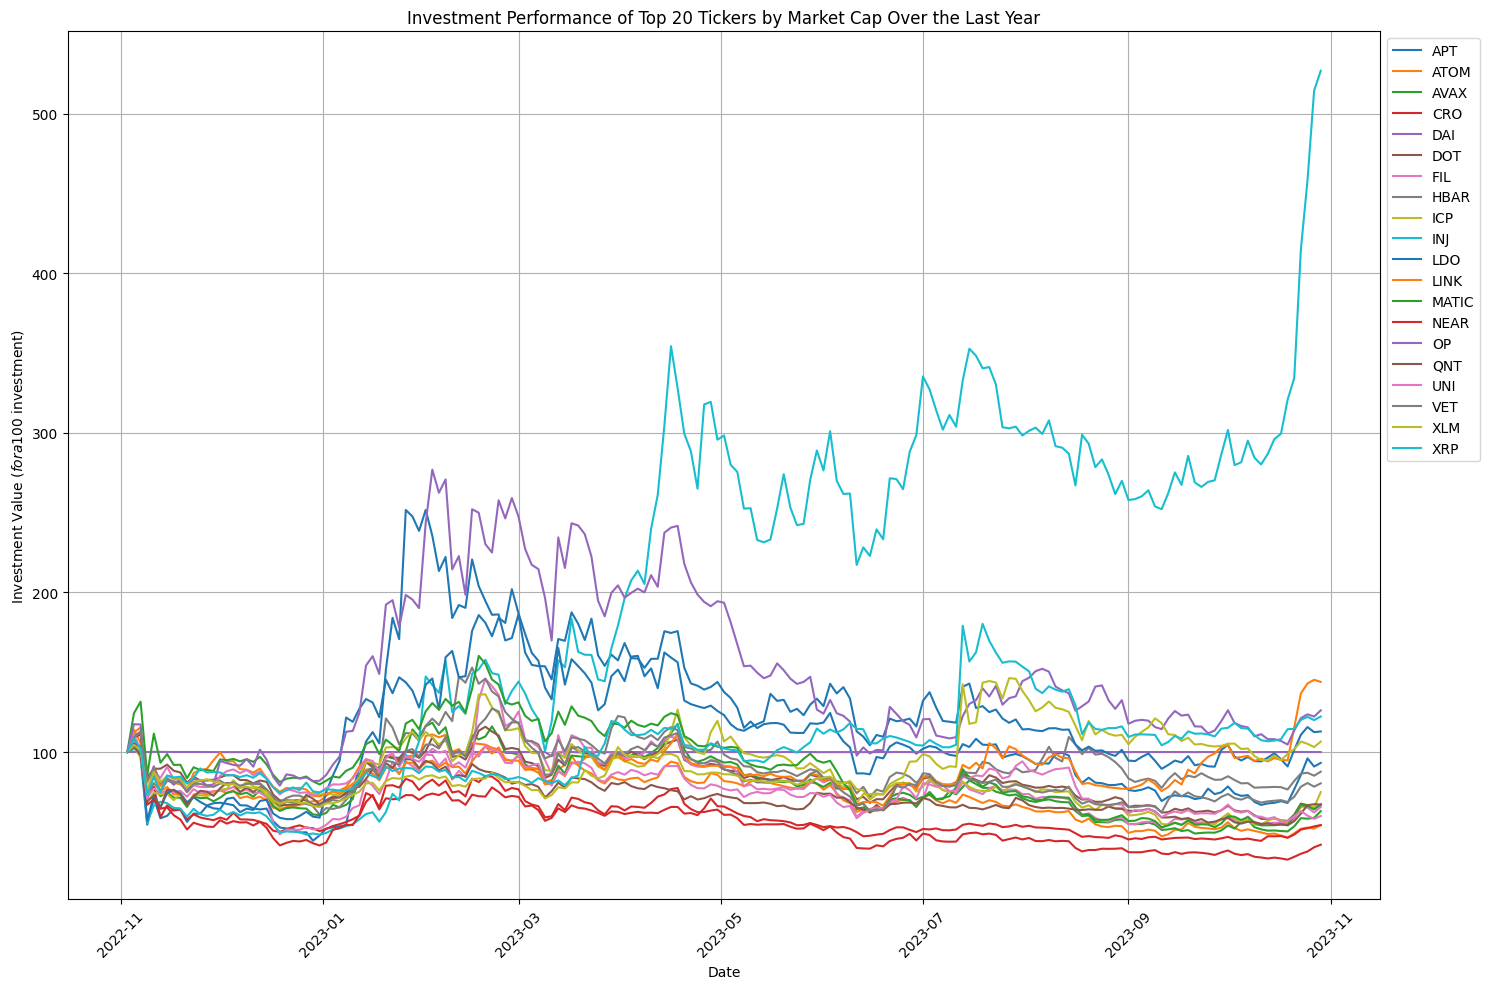

In [4]:
# Set up the figure size for the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

# Plot each ticker's investment performance
for ticker in investment_performance.columns:
    plt.plot(investment_performance.index, investment_performance[ticker], label=ticker)

# Adding titles and labels
plt.title('Investment Performance of Top 20 Tickers by Market Cap Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Investment Value ($ for a $100 investment)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()





The line chart above displays the investment performance of the top 20 tickers by market capitalization over the last year, assuming a $100 investment in each. Each line represents the growth or decline of the investment value for a particular ticker over time.​

### Next, let's move to step 1B: Identifying the top 20 most volatile tickers based on the last year's data and plotting their $100 investment performance. We'll calculate volatility as the standard deviation of daily returns.​

In [6]:
# Calculate daily returns for each ticker
daily_returns = pivot_prices.pct_change().dropna()

# Calculate volatility for each ticker (standard deviation of daily returns)
volatility = daily_returns.std()

# Now we take the top 20 tickers with the highest volatility
top_20_volatile_tickers = volatility.nlargest(20).index

# Filter the data to include only the top 20 volatile tickers
top_20_volatile_data = data_last_year[data_last_year['ticker'].isin(top_20_volatile_tickers)]

# We will create a pivot table with dates as the index and tickers as the columns, with the close prices for the volatile tickers
pivot_volatile_prices = top_20_volatile_data.pivot(index='timestamp', columns='ticker', values='close')

# Calculate the initial price for each volatile ticker (first available price in the last year)
initial_volatile_prices = pivot_volatile_prices.iloc[0]

# Calculate the investment performance ($100 / initial price * price for each day) for the volatile tickers
investment_volatile_performance = 100 / initial_volatile_prices * pivot_volatile_prices

investment_volatile_performance.head(), initial_volatile_prices, top_20_volatile_tickers


(ticker                            APT        ATOM        AVAX         CRO  \
 timestamp                                                                   
 2022-11-03 00:00:00+00:00  100.000000  100.000000  100.000000  100.000000   
 2022-11-05 00:00:00+00:00  105.553834  113.981746  108.619357  109.767143   
 2022-11-07 00:00:00+00:00   96.738761  105.621243  100.115054  112.507341   
 2022-11-09 00:00:00+00:00   54.442816   72.476777   71.576471   73.157479   
 2022-11-11 00:00:00+00:00   71.047124   86.261674   78.101811   78.166265   
 
 ticker                            DAI         DOT         FIL        HBAR  \
 timestamp                                                                   
 2022-11-03 00:00:00+00:00  100.000000  100.000000  100.000000  100.000000   
 2022-11-05 00:00:00+00:00   99.988303  109.247119  106.600078  103.815056   
 2022-11-07 00:00:00+00:00  100.011101  110.838692   99.255064   98.842772   
 2022-11-09 00:00:00+00:00  100.003542   84.251049   71.720485

### Let's now visualize this data in a line chart.​

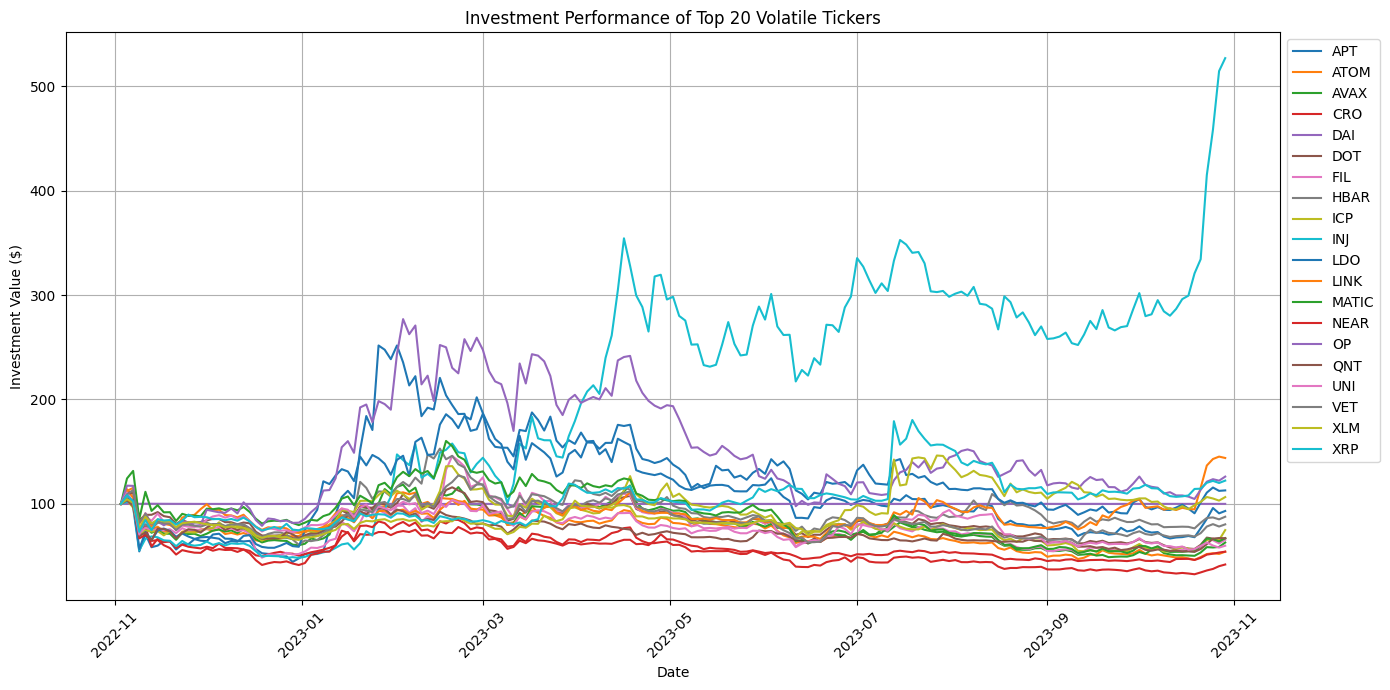

In [7]:
# Plotting the investment performance of the top 20 volatile tickers
plt.figure(figsize=(14, 7))
for ticker in investment_volatile_performance.columns:
    plt.plot(investment_volatile_performance.index, investment_volatile_performance[ticker], label=ticker)
plt.title('Investment Performance of Top 20 Volatile Tickers')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

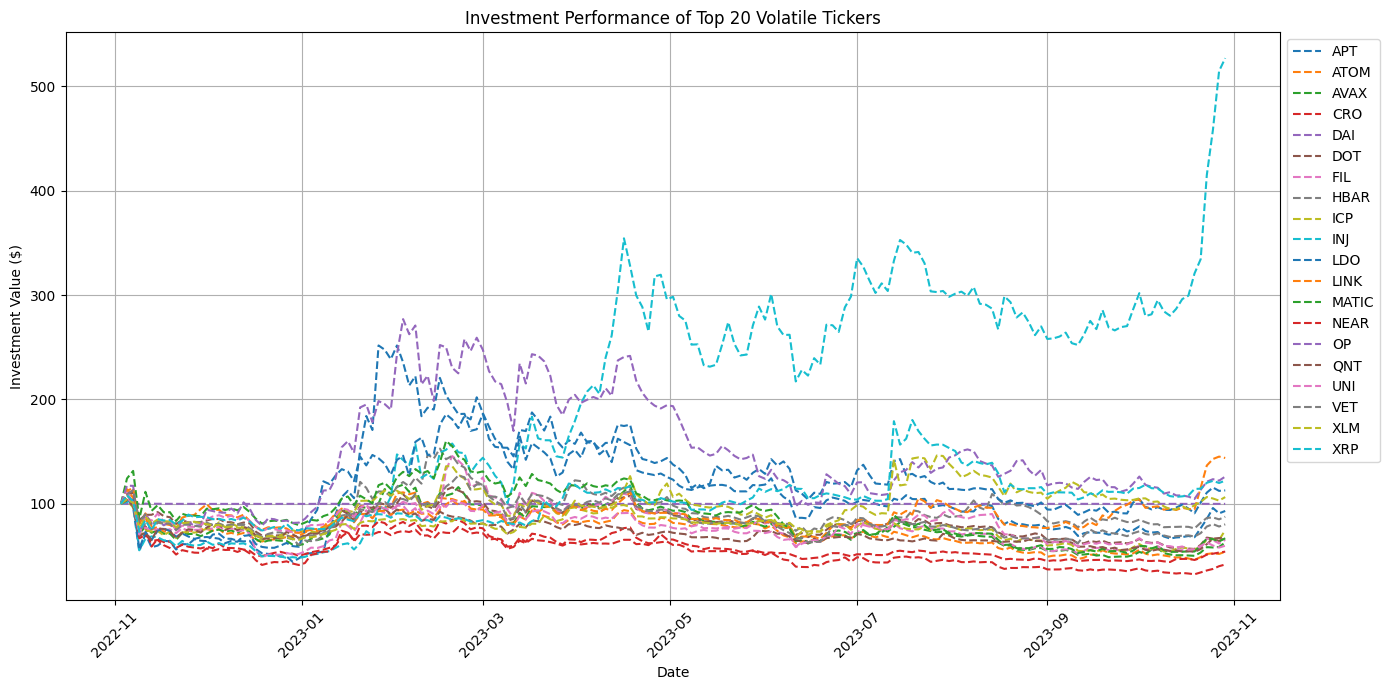

In [8]:
# Plotting the investment performance of the top 20 most volatile tickers
plt.figure(figsize=(14, 7))
for ticker in investment_volatile_performance.columns:
    plt.plot(investment_volatile_performance.index, investment_volatile_performance[ticker], label=ticker, linestyle='--')
plt.title('Investment Performance of Top 20 Volatile Tickers')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Draw a chart of the total investment (2000 dollars) of top 20 stocks by market cap vs total value of investment in the 20 volatile stocks

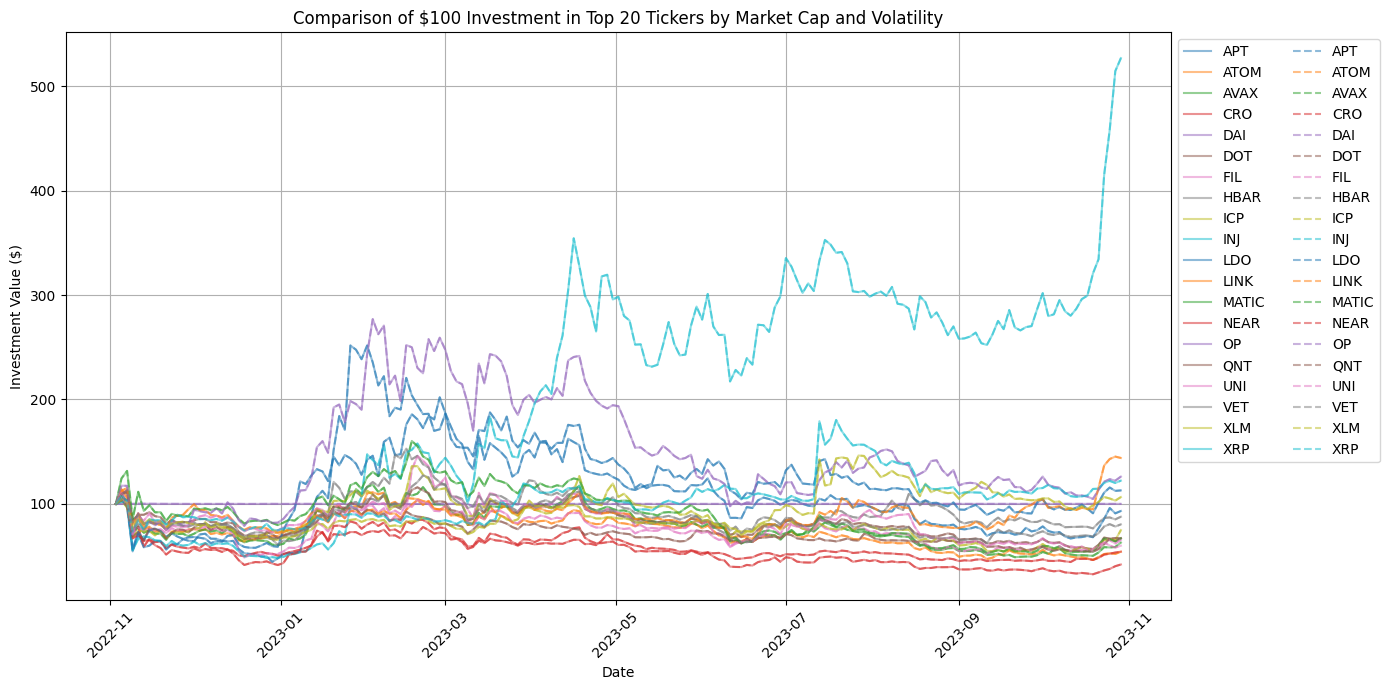

In [9]:
# Plotting the investment performance of top 20 by market cap and top 20 most volatile tickers together for comparison
plt.figure(figsize=(14, 7))

# Plot each ticker's performance from the market cap benchmark
for ticker in investment_performance.columns:
    plt.plot(investment_performance.index, investment_performance[ticker], label=ticker, alpha=0.5)

# Plot each ticker's performance from the volatile benchmark
for ticker in investment_volatile_performance.columns:
    plt.plot(investment_volatile_performance.index, investment_volatile_performance[ticker], label=ticker, alpha=0.5, linestyle='--')

# Adding titles and labels
plt.title('Comparison of $100 Investment in Top 20 Tickers by Market Cap and Volatility')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=2)
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Old Code

In [10]:
# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Select data from the last one year
one_year_ago = data['timestamp'].max() - pd.Timedelta(days=365)
data_last_year = data[data['timestamp'] > one_year_ago]

# Remove any duplicates that might cause issues during pivoting
cleaned_data = data_last_year.drop_duplicates(subset=['timestamp', 'ticker'], keep='first')

# Let's check again for any duplicate rows to ensure we can pivot successfully
duplicates_check = cleaned_data.groupby(['timestamp', 'ticker']).size()
duplicates_check = duplicates_check[duplicates_check > 1]

# If no duplicates are found, we proceed with selecting a few random tickers
if duplicates_check.empty:
    # Randomly select 2 tickers for the demonstration
    random_tickers = cleaned_data['ticker'].sample(2).unique()
else:
    print(f"Found {len(duplicates_check)} duplicate rows after cleaning.")

random_tickers


array(['BAT', 'GF'], dtype=object)

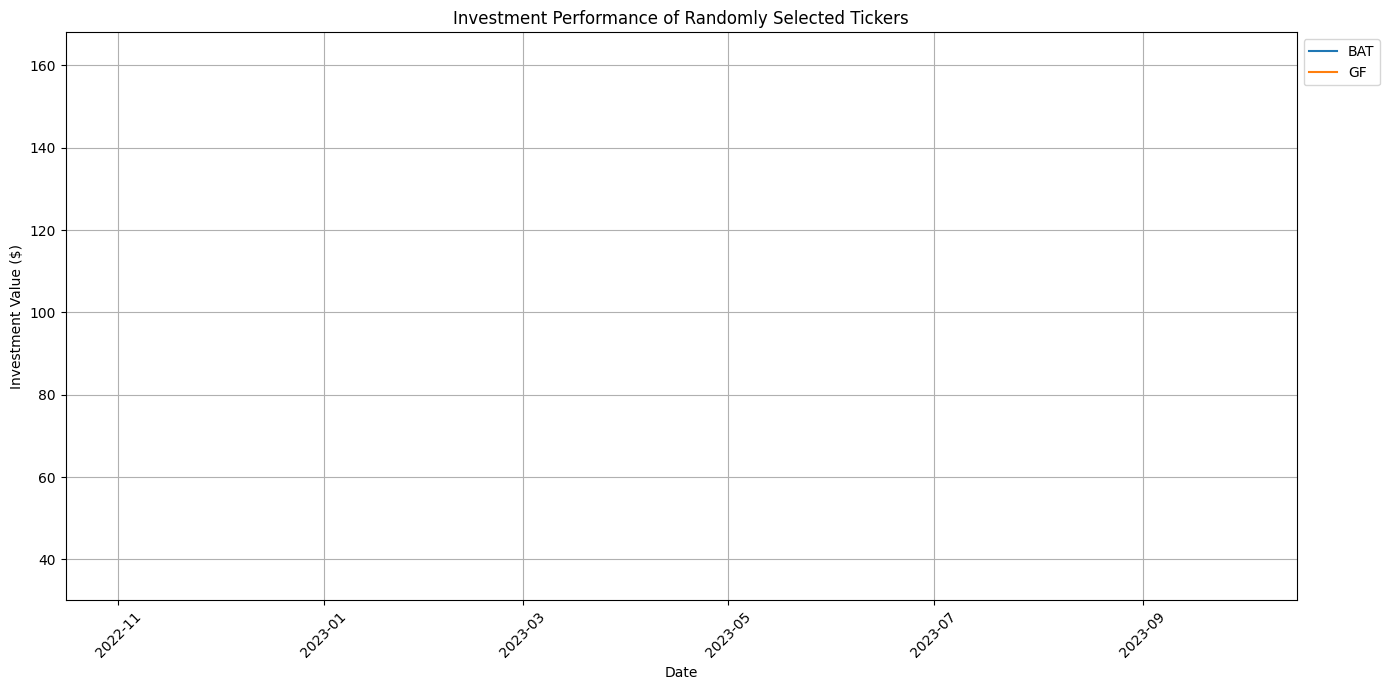

In [11]:
# Pivot the cleaned data to get the closing prices for the randomly selected tickers
pivot_random = cleaned_data[cleaned_data['ticker'].isin(random_tickers)].pivot(index='timestamp', columns='ticker', values='close')

# Calculate the investment performance for the randomly selected tickers
investment_random_performance = 100 / pivot_random.iloc[0] * pivot_random

# Now, let's plot the investment performance of the randomly selected tickers
plt.figure(figsize=(14, 7))

# Plot each randomly selected ticker's performance
for ticker in investment_random_performance.columns:
    plt.plot(investment_random_performance.index, investment_random_performance[ticker], label=ticker)

# Adding titles and labels
plt.title('Investment Performance of Randomly Selected Tickers')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Modified code where you can specify the ticker IDs of your choice instead of selecting them randomly. You just need to replace 'TICKER1' and 'TICKER2' with your chosen ticker IDs.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Select data from the last one year
one_year_ago = data['timestamp'].max() - pd.Timedelta(days=365)
data_last_year = data[data['timestamp'] > one_year_ago]

# Remove any duplicates that might cause issues during pivoting
cleaned_data = data_last_year.drop_duplicates(subset=['timestamp', 'ticker'], keep='first')

# Let's check again for any duplicate rows to ensure we can pivot successfully
duplicates_check = cleaned_data.groupby(['timestamp', 'ticker']).size()
duplicates_check = duplicates_check[duplicates_check > 1]

if duplicates_check.empty:
    # Specify the tickers of your choice
    chosen_tickers = ['TICKER1', 'TICKER2']  # Replace these with your ticker IDs
else:
    print(f"Found {len(duplicates_check)} duplicate rows after cleaning.")

# Pivot the cleaned data to get the closing prices for the chosen tickers
pivot_chosen = cleaned_data[cleaned_data['ticker'].isin(chosen_tickers)].pivot(index='timestamp', columns='ticker', values='close')

# Calculate the investment performance for the chosen tickers
investment_chosen_performance = 100 / pivot_chosen.iloc[0] * pivot_chosen

# Now, let's plot the investment performance of the chosen tickers
plt.figure(figsize=(14, 7))

# Plot each chosen ticker's performance
for ticker in investment_chosen_performance.columns:
    plt.plot(investment_chosen_performance.index, investment_chosen_performance[ticker], label=ticker)

# Adding titles and labels
plt.title('Investment Performance of Chosen Tickers')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Make this graph for 2000 dollars investment, sum of all top 20 tickers by market cap and sum of all 20 volatile stocks

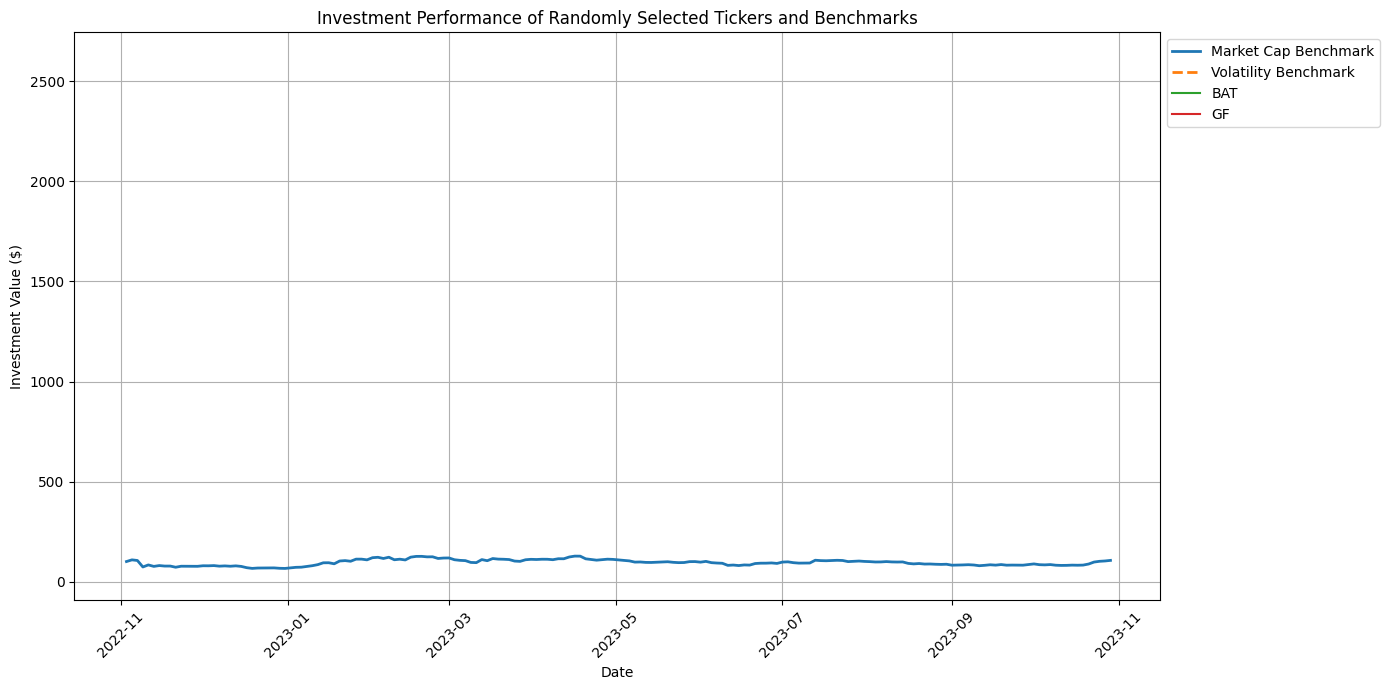

In [13]:
# Since we have cleaned data, we'll need to recalculate the top 20 by market cap and volatility
# Calculate the top 20 tickers by market cap
latest_market_cap = cleaned_data.groupby('ticker')['marketCap'].last()
top_20_market_cap_tickers = latest_market_cap.nlargest(20).index

# Calculate the top 20 tickers by volatility
pivot_prices = cleaned_data.pivot(index='timestamp', columns='ticker', values='close')
daily_returns = pivot_prices.pct_change()
volatility = daily_returns.std()
top_20_volatile_tickers = volatility.nlargest(20).index

# Prepare the benchmark data
pivot_market_cap = cleaned_data[cleaned_data['ticker'].isin(top_20_market_cap_tickers)].pivot(index='timestamp', columns='ticker', values='close')
investment_market_cap_performance = 100 / pivot_market_cap.iloc[0] * pivot_market_cap

pivot_volatile = cleaned_data[cleaned_data['ticker'].isin(top_20_volatile_tickers)].pivot(index='timestamp', columns='ticker', values='close')
investment_volatile_performance = 100 / pivot_volatile.iloc[0] * pivot_volatile

# Now let's plot the investment performance of the randomly selected tickers along with the benchmarks
plt.figure(figsize=(14, 7))

# Plot the benchmarks
plt.plot(investment_market_cap_performance.mean(axis=1), label='Market Cap Benchmark', linewidth=2)
plt.plot(investment_volatile_performance.mean(axis=1), label='Volatility Benchmark', linewidth=2, linestyle='--')

# Plot the randomly selected tickers
for ticker in investment_random_performance.columns:
    plt.plot(investment_random_performance.index, investment_random_performance[ticker], label=ticker)

# Adding titles and labels
plt.title('Investment Performance of Randomly Selected Tickers and Benchmarks')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### To show a combined line for the sum of the 20 stocks with the highest market cap, the sum of the 20 most volatile stocks, and the performance of a stock of your choice, you can follow these steps:

Calculate the mean performance of the top 20 stocks by market cap (as a proxy for their sum, assuming equal investment in each).

Calculate the mean performance of the top 20 most volatile stocks.

Select the stock of your choice and calculate its performance.

Plot all three lines on the same graph.

Here's how you can adjust the existing code to achieve this:

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is already defined and correct.

# Top 20 tickers by market cap
latest_market_cap = cleaned_data.groupby('ticker')['marketCap'].last()
top_20_market_cap_tickers = latest_market_cap.nlargest(20).index

# Top 20 tickers by volatility
pivot_prices = cleaned_data.pivot(index='timestamp', columns='ticker', values='close')
daily_returns = pivot_prices.pct_change()
volatility = daily_returns.std()
top_20_volatile_tickers = volatility.nlargest(20).index

# Benchmark data for market cap
pivot_market_cap = cleaned_data[cleaned_data['ticker'].isin(top_20_market_cap_tickers)].pivot(index='timestamp', columns='ticker', values='close')
investment_market_cap_performance = 100 / pivot_market_cap.iloc[0] * pivot_market_cap

# Benchmark data for volatility
pivot_volatile = cleaned_data[cleaned_data['ticker'].isin(top_20_volatile_tickers)].pivot(index='timestamp', columns='ticker', values='close')
investment_volatile_performance = 100 / pivot_volatile.iloc[0] * pivot_volatile

# Your chosen ticker - replace 'YOUR_CHOSEN_TICKER' with the actual ticker symbol
chosen_ticker_data = cleaned_data[cleaned_data['ticker'] == 'YOUR_CHOSEN_TICKER']
pivot_chosen_ticker = chosen_ticker_data.pivot(index='timestamp', columns='ticker', values='close')
investment_chosen_ticker_performance = 100 / pivot_chosen_ticker.iloc[0] * pivot_chosen_ticker

# Plot the investment performance
plt.figure(figsize=(14, 7))

# Plot the mean of the top 20 market cap stocks
plt.plot(investment_market_cap_performance.mean(axis=1), label='Market Cap Top 20 Mean', linewidth=2)

# Plot the mean of the top 20 volatile stocks
plt.plot(investment_volatile_performance.mean(axis=1), label='Volatility Top 20 Mean', linewidth=2, linestyle='--')

# Plot the performance of your chosen ticker
plt.plot(investment_chosen_ticker_performance, label='Chosen Ticker', linewidth=2, linestyle='-.')

# Adding titles and labels
plt.title('Investment Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Investment Value (Indexed to 100 at Start)')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This above code plots the average performance of the top 20 market cap stocks, the top 20 volatile stocks, and the stock of your choice. The performance is indexed to 100 at the start for comparison. Remember to replace 'YOUR_CHOSEN_TICKER' with the ticker symbol you want to include.

### 3. Most of these tickers rise sharply and then fall back. Show a dashboard on

3a - how often do they rise by what percentage ## per day and for how many consective days

3b - how long is the rise in days and fall cycle lasts?

3c- By what percentage they rise every day and after how many days they start to fall and by what percentage they fall every day?

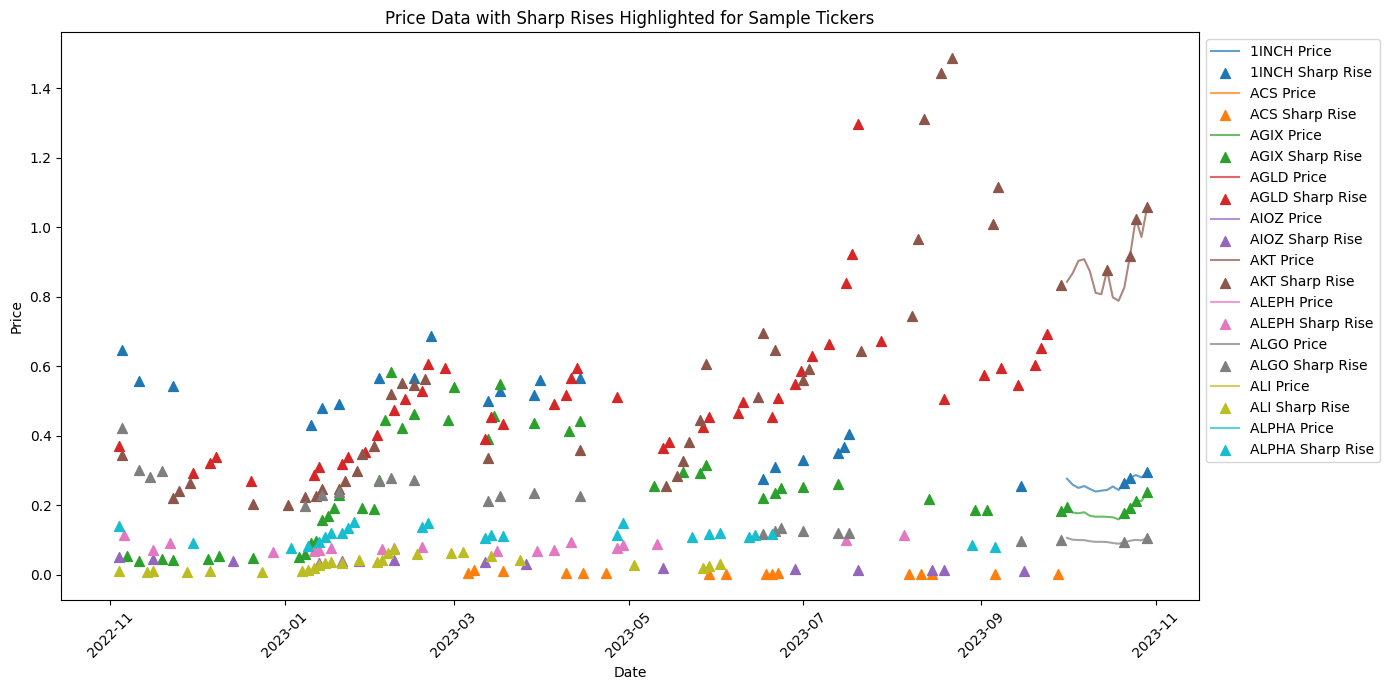

ticker
RDNT     53
NAKA     50
AGIX     48
FET      48
AGLD     47
MAGIC    47
INJ      45
AKT      44
VPP      43
CFX      42
dtype: int64

In [15]:
# Calculate daily returns for all tickers
daily_returns_all = pivot_prices.pct_change()

# Define the sharp rise threshold as a 5% increase
sharp_rise_threshold = 0.05  # 5%

# Identify sharp rises for all tickers
sharp_rises_all = (daily_returns_all > sharp_rise_threshold)

# Visualize sharp rises on the price data for a selection of tickers
# We will create the plot for a manageable number of tickers to avoid clutter
sample_tickers = daily_returns_all.columns[:10]  # Let's take 10 tickers as a sample for visualization

plt.figure(figsize=(14, 7))

# Plotting price data and sharp rises for sample tickers
for ticker in sample_tickers:
    # Plot the price data
    plt.plot(pivot_prices.index, pivot_prices[ticker], label=f"{ticker} Price", alpha=0.7)
    # Highlight the days with a sharp rise
    plt.scatter(pivot_prices.index[sharp_rises_all[ticker]], pivot_prices[ticker][sharp_rises_all[ticker]], label=f"{ticker} Sharp Rise", marker='^', s=50)

# Enhance plot aesthetics
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Price Data with Sharp Rises Highlighted for Sample Tickers")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count the number of sharp rises for each ticker for statistical summary
sharp_rises_count_all = sharp_rises_all.sum().sort_values(ascending=False)
sharp_rises_count_all.head(10)  # Display the top 10 tickers with the most sharp rises


The plot above visualizes the price data for a sample of 10 tickers, with sharp rises highlighted. These sharp rises are identified by the red triangles, representing days where the price increased by more than 5%. The visualization is limited to 10 tickers to maintain clarity, but the statistical summary shows the top 10 tickers with the most number of sharp rises across the entire dataset.

 ### if you have a specific set of tickers you'd like to analyze, or if you want to focus on a smaller number of tickers for clarity, you could modify the sample_tickers assignment line to select the tickers you are interested in.

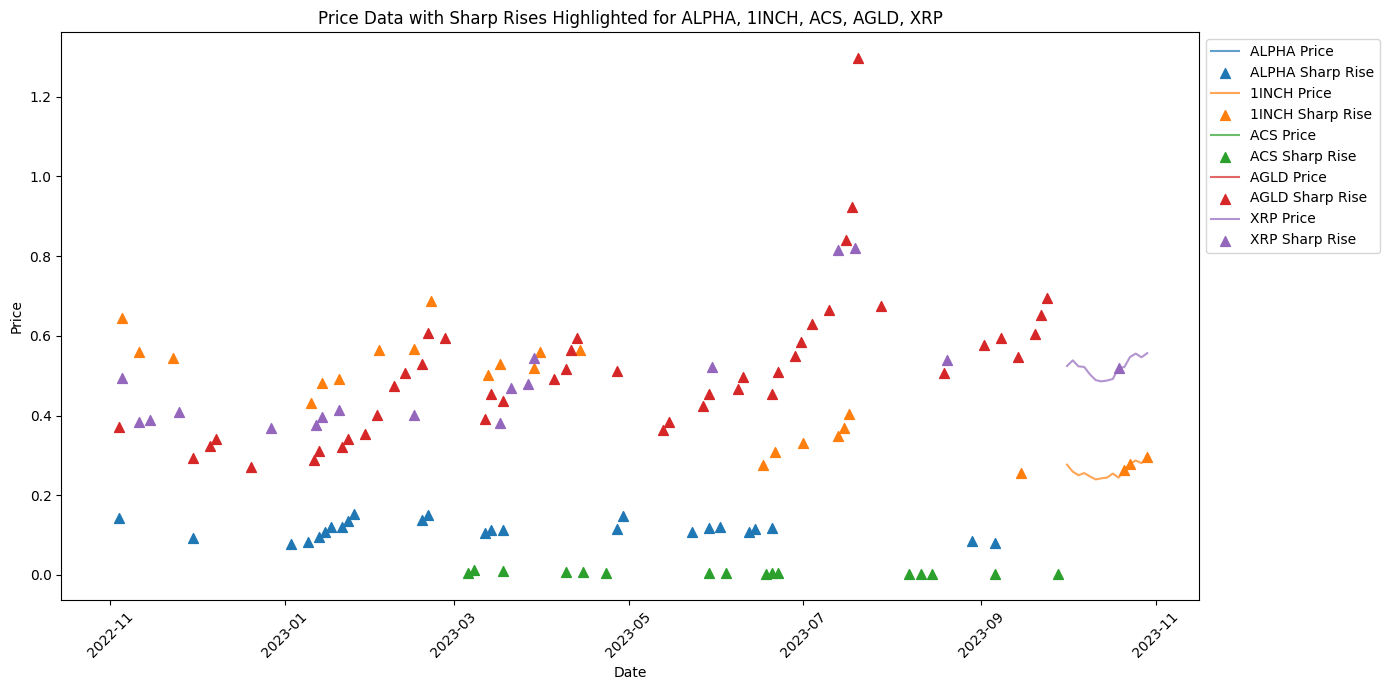

In [16]:
# Instead of taking the first 10 tickers, specify the tickers you want to plot
chosen_tickers = ['ALPHA', '1INCH', 'ACS', 'AGLD', 'XRP']  # Replace with tickers of your choice

plt.figure(figsize=(14, 7))

# Plotting price data and sharp rises for chosen tickers
for ticker in chosen_tickers:
    # Plot the price data
    plt.plot(pivot_prices.index, pivot_prices[ticker], label=f"{ticker} Price", alpha=0.7)
    # Highlight the days with a sharp rise
    plt.scatter(pivot_prices.index[sharp_rises_all[ticker]], pivot_prices[ticker][sharp_rises_all[ticker]], label=f"{ticker} Sharp Rise", marker='^', s=50)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title(f"Price Data with Sharp Rises Highlighted for {', '.join(chosen_tickers)}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Function to calculate rise and fall cycle durations
def calculate_rise_fall_cycles(prices):
    rise_cycles = []
    fall_cycles = []
    is_rising = None
    cycle_length = 1

    for i in range(1, len(prices)):
        if prices.iloc[i] > prices.iloc[i - 1]:
            if is_rising is False:  # If it was falling before, start a new rise cycle
                fall_cycles.append(cycle_length)
                cycle_length = 1
            is_rising = True
        elif prices.iloc[i] < prices.iloc[i - 1]:
            if is_rising is True:  # If it was rising before, start a new fall cycle
                rise_cycles.append(cycle_length)
                cycle_length = 1
            is_rising = False
        cycle_length += 1

    # Append the last cycle
    if is_rising:
        rise_cycles.append(cycle_length)
    else:
        fall_cycles.append(cycle_length)

    return rise_cycles, fall_cycles

# Apply the function to each ticker to get the cycle lengths
rise_fall_cycles_all = pivot_prices.apply(calculate_rise_fall_cycles, result_type='expand')

# Get statistics on the rise and fall cycles for all tickers
rise_fall_cycle_stats = rise_fall_cycles_all.applymap(lambda cycles: pd.Series(cycles).describe())

rise_fall_cycle_stats.head(10)  # Display stats for the first 10 tickers



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15648\768682589.py:33: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rise_fall_cycle_stats = rise_fall_cycles_all.applymap(lambda cycles: pd.Series(cycles).describe())
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15648\768682589.py:33: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rise_fall_cycle_stats = rise_fall_cycles_all.applymap(lambda cycles: pd.Series(cycles).describe())
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15648\768682589.py:33: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rise_fall_cycle_stats = rise_fall_cycles_all.applymap(lambda cycles: pd.Series(cycles).describe())
C:\Users\L

ticker,1INCH,ACS,AGIX,AGLD,AIOZ,AKT,ALEPH,ALGO,ALI,ALPHA,...,WILD,WOO,XEM,XLM,XPR,XPRT,XRP,XTZ,ZIL,erowan
0,count 4.000000 mean 5.750000 std ...,count 0.0 mean NaN std NaN min ...,count 4.000000 mean 5.250000 std ...,count 0.0 mean NaN std NaN min ...,count 0.0 mean NaN std NaN min ...,count 4.000000 mean 89.000000 std ...,count 0.0 mean NaN std NaN min ...,count 3.000000 mean 6.333333 std ...,count 0.0 mean NaN std NaN min ...,count 0.0 mean NaN std NaN min ...,...,count 0.0 mean NaN std NaN min ...,count 4.000000 mean 6.000000 std ...,count 4.000000 mean 5.500000 std ...,count 5.000000 mean 71.200000 std ...,count 0.0 mean NaN std NaN min ...,count 0.0 mean NaN std NaN min ...,count 3.000000 mean 118.333333 std ...,count 5.000000 mean 4.600000 std ...,count 4.000000 mean 5.750000 std ...,count 0.0 mean NaN std NaN min ...
1,count 4.000000 mean 85.750000 std ...,count 1.0 mean 359.0 std NaN m...,count 4.000000 mean 86.250000 std ...,count 1.0 mean 359.0 std NaN m...,count 1.0 mean 359.0 std NaN m...,count 3.0 mean 3.0 std 1.0 min ...,count 1.0 mean 359.0 std NaN m...,count 3.000000 mean 115.000000 std ...,count 1.0 mean 359.0 std NaN m...,count 1.0 mean 359.0 std NaN m...,...,count 1.0 mean 359.0 std NaN m...,count 4.000000 mean 85.500000 std ...,count 4.000000 mean 86.000000 std ...,count 4.000000 mean 2.750000 std 0...,count 1.0 mean 359.0 std NaN m...,count 1.0 mean 359.0 std NaN m...,count 2.000000 mean 4.000000 std 2...,count 5.000000 mean 69.000000 std ...,count 4.000000 mean 85.750000 std ...,count 1.0 mean 359.0 std NaN m...


### Modified code for the table

In [18]:
import pandas as pd
import numpy as np

# Function to calculate rise and fall cycle durations
def calculate_rise_fall_cycles(prices):
    rise_cycles = []
    fall_cycles = []
    is_rising = None
    cycle_length = 1

    for i in range(1, len(prices)):
        if prices.iloc[i] > prices.iloc[i - 1]:
            if is_rising is False:
                fall_cycles.append(cycle_length)
                cycle_length = 1
            is_rising = True
        elif prices.iloc[i] < prices.iloc[i - 1]:
            if is_rising is True:
                rise_cycles.append(cycle_length)
                cycle_length = 1
            is_rising = False
        cycle_length += 1

    # Append the last cycle
    if is_rising:
        rise_cycles.append(cycle_length)
    else:
        fall_cycles.append(cycle_length)

    # Ensure that rise_cycles and fall_cycles are never empty
    if not rise_cycles:
        rise_cycles.append(0)
    if not fall_cycles:
        fall_cycles.append(0)

    return rise_cycles, fall_cycles

# Apply the function to each ticker to get the cycle lengths
rise_fall_cycles_all = pivot_prices.apply(calculate_rise_fall_cycles, result_type='expand')

# Function to describe cycles and handle empty lists
def describe_cycles(cycles):
    if not cycles:  # If the list is empty, return NaN statistics
        return pd.Series([np.nan]*5, index=['count', 'mean', 'std', 'min', 'max'])
    else:
        return pd.Series(cycles, dtype=float).describe()

# Get statistics on the rise and fall cycles for all tickers
rise_fall_cycle_stats = rise_fall_cycles_all.applymap(describe_cycles)

# Now, no need to remove multi-level index, so the next two lines are removed:
# rise_fall_cycle_stats.columns = rise_fall_cycle_stats.columns.droplevel(0)

rise_fall_cycle_stats.head(10)  # Display stats for the first 10 tickers

ticker,1INCH,ACS,AGIX,AGLD,AIOZ,AKT,ALEPH,ALGO,ALI,ALPHA,...,WILD,WOO,XEM,XLM,XPR,XPRT,XRP,XTZ,ZIL,erowan
0,count 4.000000 mean 5.750000 std ...,count 1.0 mean 0.0 std NaN min ...,count 4.000000 mean 5.250000 std ...,count 1.0 mean 0.0 std NaN min ...,count 1.0 mean 0.0 std NaN min ...,count 4.000000 mean 89.000000 std ...,count 1.0 mean 0.0 std NaN min ...,count 3.000000 mean 6.333333 std ...,count 1.0 mean 0.0 std NaN min ...,count 1.0 mean 0.0 std NaN min ...,...,count 1.0 mean 0.0 std NaN min ...,count 4.000000 mean 6.000000 std ...,count 4.000000 mean 5.500000 std ...,count 5.000000 mean 71.200000 std ...,count 1.0 mean 0.0 std NaN min ...,count 1.0 mean 0.0 std NaN min ...,count 3.000000 mean 118.333333 std ...,count 5.000000 mean 4.600000 std ...,count 4.000000 mean 5.750000 std ...,count 1.0 mean 0.0 std NaN min ...
1,count 4.000000 mean 85.750000 std ...,count 1.0 mean 359.0 std NaN m...,count 4.000000 mean 86.250000 std ...,count 1.0 mean 359.0 std NaN m...,count 1.0 mean 359.0 std NaN m...,count 3.0 mean 3.0 std 1.0 min ...,count 1.0 mean 359.0 std NaN m...,count 3.000000 mean 115.000000 std ...,count 1.0 mean 359.0 std NaN m...,count 1.0 mean 359.0 std NaN m...,...,count 1.0 mean 359.0 std NaN m...,count 4.000000 mean 85.500000 std ...,count 4.000000 mean 86.000000 std ...,count 4.000000 mean 2.750000 std 0...,count 1.0 mean 359.0 std NaN m...,count 1.0 mean 359.0 std NaN m...,count 2.000000 mean 4.000000 std 2...,count 5.000000 mean 69.000000 std ...,count 4.000000 mean 85.750000 std ...,count 1.0 mean 359.0 std NaN m...


The code has generated statistics on the rise and fall cycles for each ticker in the dataset. The output provides a DataFrame with two rows for each ticker. The first row (labeled as 0) contains statistics for the rise cycles, and the second row (labeled as 1) contains statistics for the fall cycles.

Here's an interpretation of the results for a few tickers:

1INCH: On average, there were about 5.75 days of consecutive price increases and 85.75 days of consecutive price decreases.

AGIX: On average, there were about 5.25 days of consecutive price increases and 86.25 days of consecutive price decreases.

AKT: On average, there were about 89 days of consecutive price increases and 3 days of consecutive price decreases.

Some tickers, like ACS, AGLD, and AIOZ, only had one long fall cycle (359 days), which suggests that they may not have had any days of consecutive price increases within the given data.

## The value of this analysis (daily percentage changes)lies in understanding which stocks have the strongest upward movements on their good days. Investors might be interested in such stocks if they are looking for potentially high-growth opportunities, albeit this could also come with higher volatility.

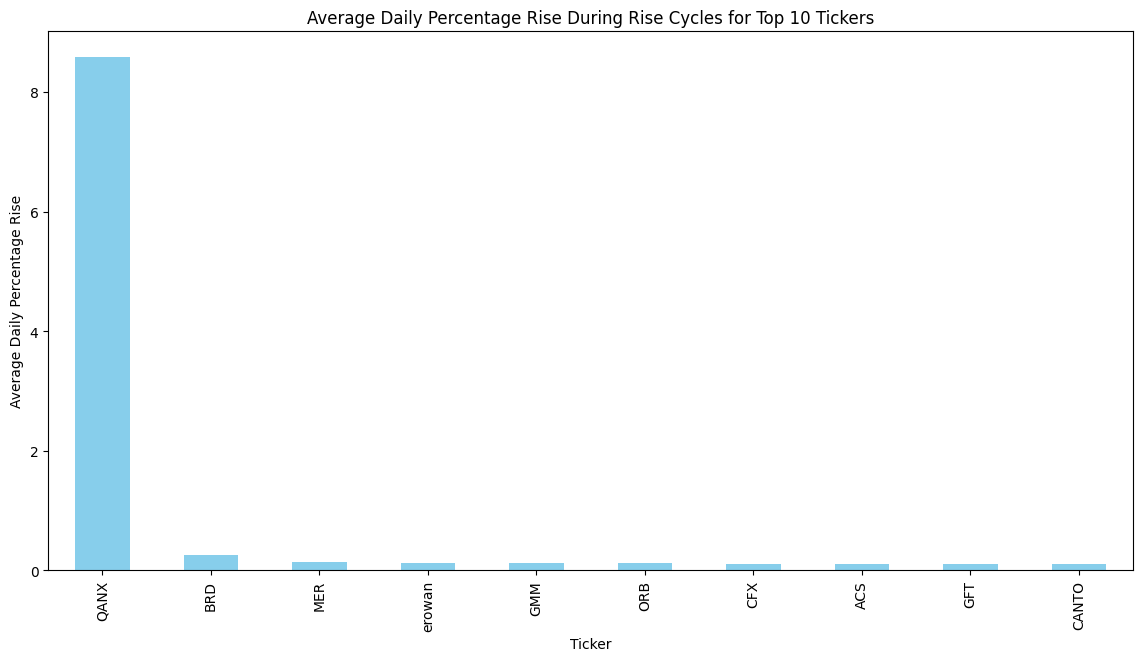

ticker
QANX      8.581477
BRD       0.256401
MER       0.142652
erowan    0.129495
GMM       0.121694
ORB       0.118606
CFX       0.115317
ACS       0.111328
GFT       0.108390
CANTO     0.103079
dtype: float64

In [19]:
# Calculate daily percentage changes during rise cycles
daily_rise_percentages = daily_returns_all[daily_returns_all > 0]

# Calculate the mean daily percentage rise for each ticker
mean_daily_rise_percentages = daily_rise_percentages.mean().sort_values(ascending=False)

# Visualize the average daily percentage rise for the top 10 tickers
plt.figure(figsize=(14, 7))
mean_daily_rise_percentages.head(10).plot(kind='bar', color='skyblue')
plt.title('Average Daily Percentage Rise During Rise Cycles for Top 10 Tickers')
plt.xlabel('Ticker')
plt.ylabel('Average Daily Percentage Rise')
plt.show()

mean_daily_rise_percentages.head(10)  # Show the top 10 tickers with their average daily rise percentage

## 4. Show a line chart with the overall market cap and identify when the value significantly increases or drops.

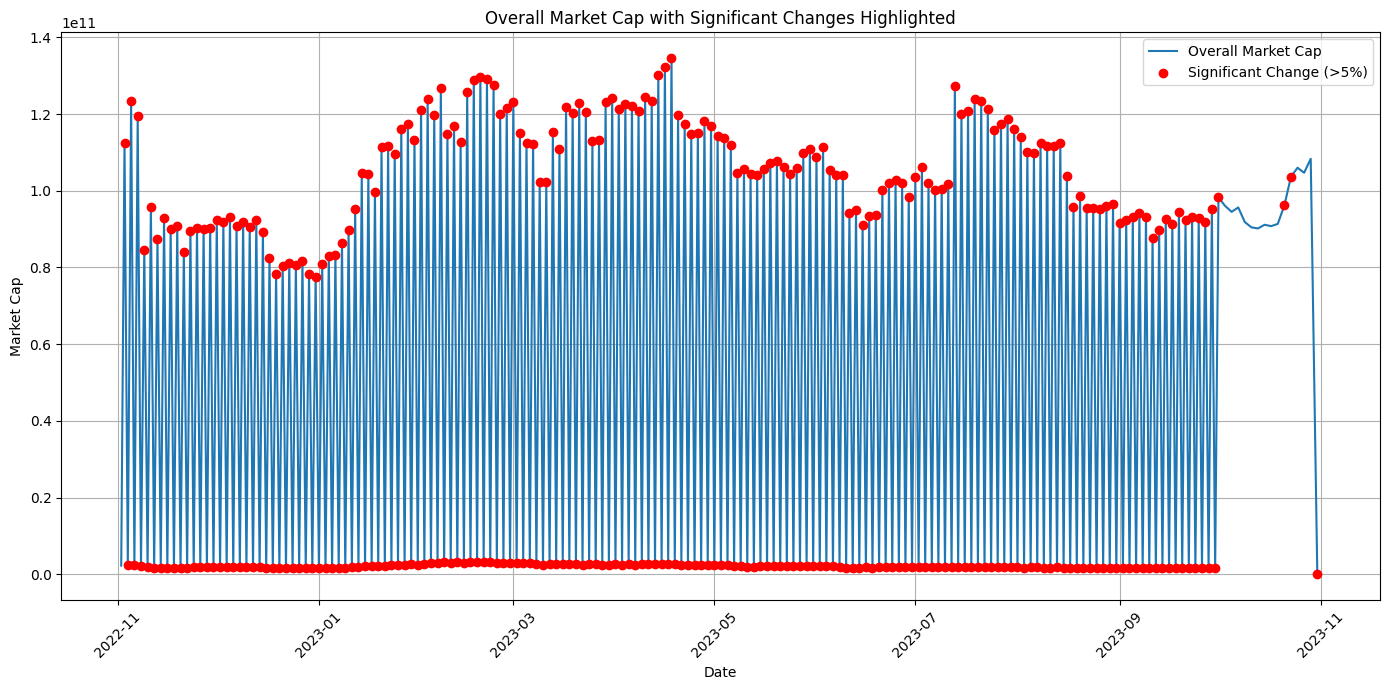

timestamp
2022-11-03 00:00:00+00:00    1.125189e+11
2022-11-04 00:00:00+00:00    2.498056e+09
2022-11-05 00:00:00+00:00    1.234754e+11
2022-11-06 00:00:00+00:00    2.474007e+09
2022-11-07 00:00:00+00:00    1.195349e+11
                                 ...     
2023-09-30 00:00:00+00:00    1.672707e+09
2023-10-01 00:00:00+00:00    9.826989e+10
2023-10-21 00:00:00+00:00    9.617249e+10
2023-10-23 00:00:00+00:00    1.036569e+11
2023-10-31 00:00:00+00:00    1.098872e+06
Name: marketCap, Length: 336, dtype: float64

In [20]:
# Aggregate the market cap data to get the overall market cap by date
overall_market_cap = cleaned_data.groupby('timestamp')['marketCap'].sum()

# Calculate the daily percentage change of the overall market cap
overall_market_cap_pct_change = overall_market_cap.pct_change()

# Identify significant increases or drops by setting a threshold
significant_change_threshold = 0.05  # 5% change
significant_changes = overall_market_cap_pct_change.abs() > significant_change_threshold

# Plot the overall market cap over time
plt.figure(figsize=(14, 7))
plt.plot(overall_market_cap.index, overall_market_cap, label='Overall Market Cap')

# Highlight significant increases or drops
plt.scatter(overall_market_cap.index[significant_changes], overall_market_cap[significant_changes], color='red', label='Significant Change (>5%)', zorder=5)

plt.title('Overall Market Cap with Significant Changes Highlighted')
plt.xlabel('Date')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the dates and amounts of significant changes
significant_changes_df = overall_market_cap[significant_changes]
significant_changes_df


The line chart above shows the overall market cap for the set of tickers in the dataset, with significant changes highlighted. These significant changes are defined as days where the market cap increased or decreased by more than 5% compared to the previous day, and they are marked by red dots on the chart.

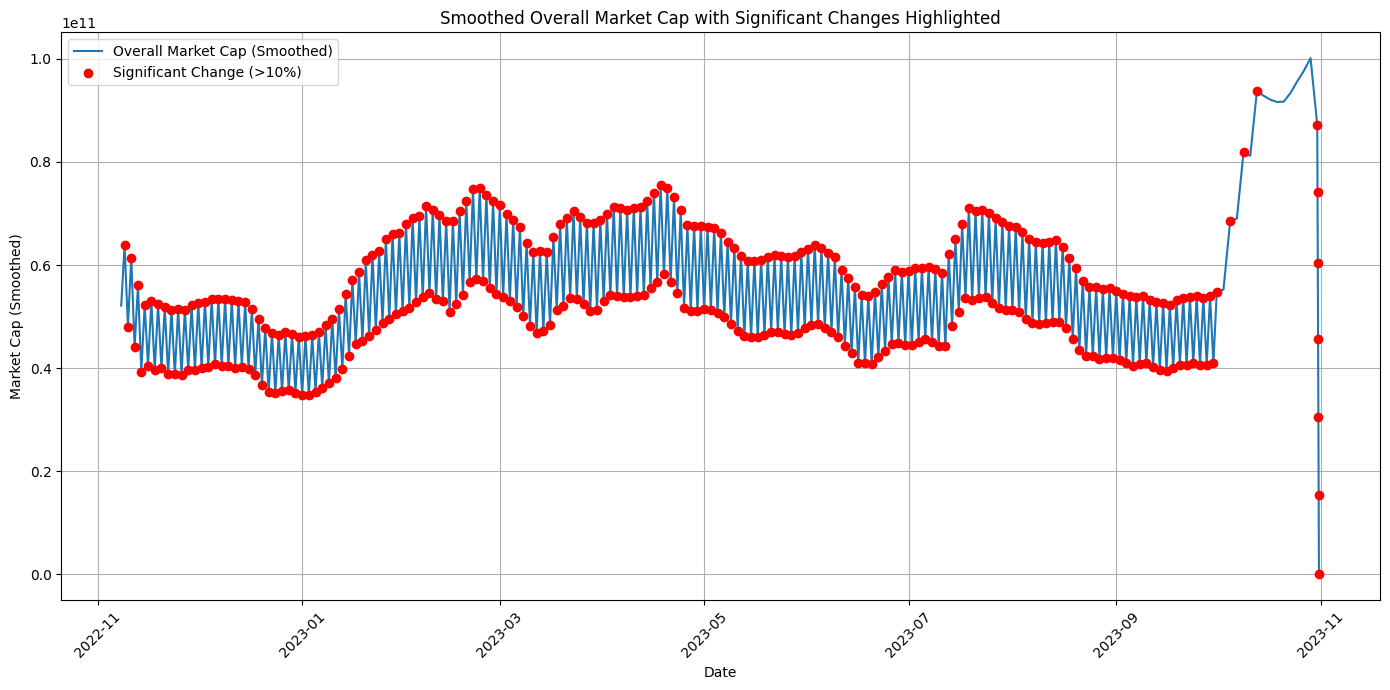

In [21]:
# Set a moving average window (e.g., 7 days)
moving_average_window = 7

# Calculate the moving average of the overall market cap
overall_market_cap_smoothed = overall_market_cap.rolling(window=moving_average_window).mean()

# Recalculate the daily percentage change based on the smoothed data
overall_market_cap_pct_change_smoothed = overall_market_cap_smoothed.pct_change()

# Adjust the threshold to a more significant change (e.g., 10%)
significant_change_threshold_adjusted = 0.10  # 10% change
significant_changes_adjusted = overall_market_cap_pct_change_smoothed.abs() > significant_change_threshold_adjusted

# Plot the smoothed overall market cap over time
plt.figure(figsize=(14, 7))
plt.plot(overall_market_cap_smoothed.index, overall_market_cap_smoothed, label='Overall Market Cap (Smoothed)')

# Highlight significant increases or drops based on the smoothed data
plt.scatter(overall_market_cap_smoothed.index[significant_changes_adjusted], overall_market_cap_smoothed[significant_changes_adjusted], color='red', label='Significant Change (>10%)', zorder=5)

plt.title('Smoothed Overall Market Cap with Significant Changes Highlighted')
plt.xlabel('Date')
plt.ylabel('Market Cap (Smoothed)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The chart has been plotted, displaying the smoothed overall market cap over the past year with significant changes (greater than 10%) highlighted in red. These points represent times when the market cap experienced significant volatility.

The chart indicates there were several periods where the market cap significantly increased or decreased. The data points with significant changes are also provided, although the values are quite large and seem to show substantial fluctuation, which might be due to the granularity of the data or the scale of market caps across different timestamps.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15648\48492015.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['volume_crossover'] = volume_crossover
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15648\48492015.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['market_cap_crossover'] = market_cap_crossover


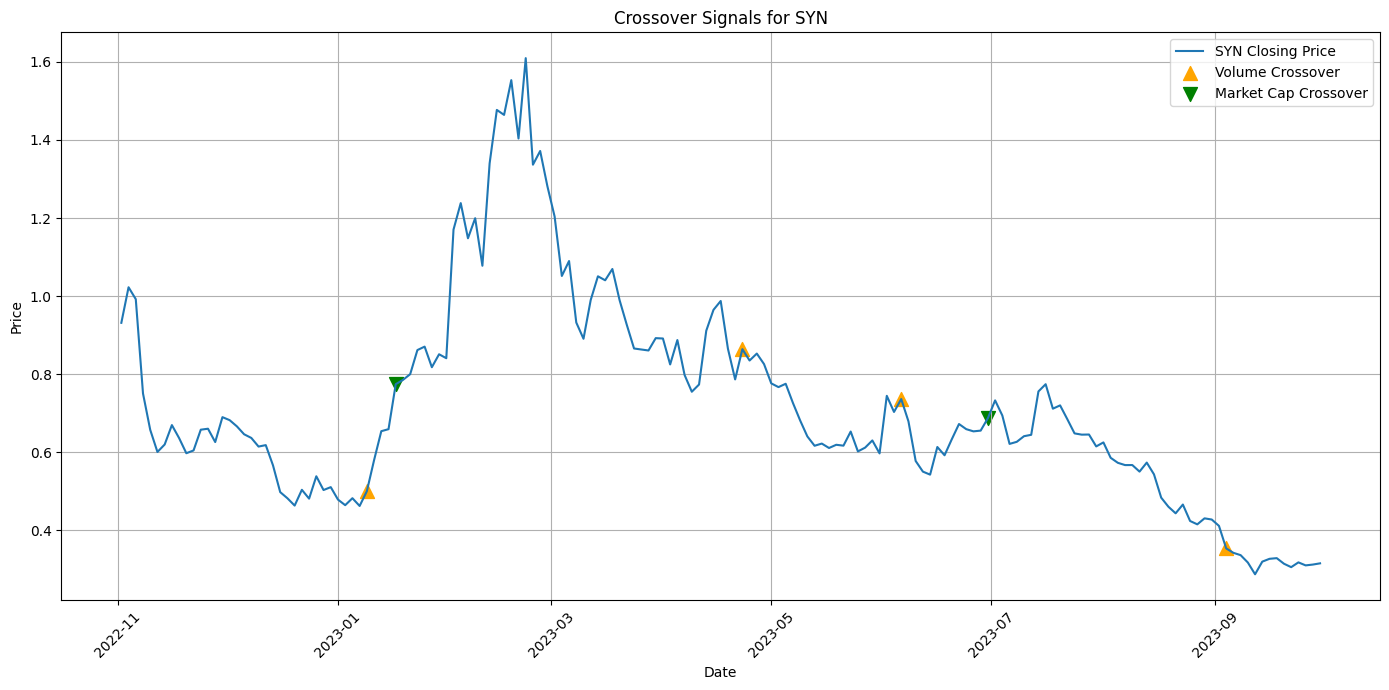

,timestamp,volume_crossover,market_cap_crossover
25821,2023-01-09 00:00:00+00:00,True,False
25825,2023-01-17 00:00:00+00:00,False,True
25873,2023-04-23 00:00:00+00:00,True,False
25895,2023-06-06 00:00:00+00:00,True,False
25907,2023-06-30 00:00:00+00:00,False,True
25940,2023-09-04 00:00:00+00:00,True,False


In [23]:
# Define moving average windows
short_window = 7
long_window = 30

# Calculate short and long moving averages for volume and market cap
volume_sma = cleaned_data.groupby('ticker')['volume'].transform(lambda x: x.rolling(window=short_window).mean())
volume_lma = cleaned_data.groupby('ticker')['volume'].transform(lambda x: x.rolling(window=long_window).mean())
market_cap_sma = cleaned_data.groupby('ticker')['marketCap'].transform(lambda x: x.rolling(window=short_window).mean())
market_cap_lma = cleaned_data.groupby('ticker')['marketCap'].transform(lambda x: x.rolling(window=long_window).mean())

# Identify crossover points for volume and market cap
volume_crossover = (volume_sma > volume_lma) & (volume_sma.shift(1) <= volume_lma.shift(1))
market_cap_crossover = (market_cap_sma > market_cap_lma) & (market_cap_sma.shift(1) <= market_cap_lma.shift(1))

# Add crossover signals to the dataframe
cleaned_data['volume_crossover'] = volume_crossover
cleaned_data['market_cap_crossover'] = market_cap_crossover

# Visualize the crossovers for a sample ticker
sample_ticker = 'SYN'

plt.figure(figsize=(14, 7))

# Plot the closing price for the sample ticker
plt.plot(cleaned_data[cleaned_data['ticker'] == sample_ticker]['timestamp'], cleaned_data[cleaned_data['ticker'] == sample_ticker]['close'], label=f'{sample_ticker} Closing Price')

# Highlight the volume crossover points
plt.scatter(cleaned_data[(cleaned_data['ticker'] == sample_ticker) & volume_crossover]['timestamp'],
            cleaned_data[(cleaned_data['ticker'] == sample_ticker) & volume_crossover]['close'],
            color='orange', label='Volume Crossover', marker='^', s=100)

# Highlight the market cap crossover points
plt.scatter(cleaned_data[(cleaned_data['ticker'] == sample_ticker) & market_cap_crossover]['timestamp'],
            cleaned_data[(cleaned_data['ticker'] == sample_ticker) & market_cap_crossover]['close'],
            color='green', label='Market Cap Crossover', marker='v', s=100)

plt.title(f'Crossover Signals for {sample_ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Return dates of volume and market cap crossovers for the sample ticker
crossover_dates = cleaned_data[(cleaned_data['ticker'] == sample_ticker) & (volume_crossover | market_cap_crossover)]
crossover_dates[['timestamp', 'volume_crossover', 'market_cap_crossover']]

In [ ]:
# We will now perform the crossover analysis for all tickers and return the dates where crossovers occurred.
# This will be a computationally intensive task given the size of the dataset.

# Initialize dictionaries to hold crossover dates for each ticker
volume_crossover_dates = {}
market_cap_crossover_dates = {}

# Iterate through all tickers to find crossovers
for ticker in cleaned_data['ticker'].unique():
    # Get data for the current ticker
    ticker_data = cleaned_data[cleaned_data['ticker'] == ticker]
    
    # Find volume crossovers for the ticker
    vol_cross = ticker_data[ticker_data['volume_crossover']]['timestamp']
    if not vol_cross.empty:
        volume_crossover_dates[ticker] = vol_cross.tolist()
    
    # Find market cap crossovers for the ticker
    mcap_cross = ticker_data[ticker_data['market_cap_crossover']]['timestamp']
    if not mcap_cross.empty:
        market_cap_crossover_dates[ticker] = mcap_cross.tolist()

# Since the output could be very large, we'll display just a part of the results
# Showing the results for the first 5 tickers for demonstration
list(volume_crossover_dates.items())[:5], list(market_cap_crossover_dates.items())[:5]

([('GRT',
   [Timestamp('2023-01-08 00:00:00+0000', tz='UTC'),
    Timestamp('2023-06-01 00:00:00+0000', tz='UTC'),
    Timestamp('2023-07-03 00:00:00+0000', tz='UTC'),
    Timestamp('2023-08-10 00:00:00+0000', tz='UTC'),
    Timestamp('2023-10-23 00:00:00+0000', tz='UTC')]),
  ('QNT',
   [Timestamp('2023-01-14 00:00:00+0000', tz='UTC'),
    Timestamp('2023-04-14 00:00:00+0000', tz='UTC'),
    Timestamp('2023-06-13 00:00:00+0000', tz='UTC'),
    Timestamp('2023-08-28 00:00:00+0000', tz='UTC'),
    Timestamp('2023-10-23 00:00:00+0000', tz='UTC')]),
  ('DCR',
   [Timestamp('2023-01-26 00:00:00+0000', tz='UTC'),
    Timestamp('2023-03-23 00:00:00+0000', tz='UTC'),
    Timestamp('2023-05-12 00:00:00+0000', tz='UTC'),
    Timestamp('2023-06-13 00:00:00+0000', tz='UTC'),
    Timestamp('2023-07-03 00:00:00+0000', tz='UTC'),
    Timestamp('2023-07-13 00:00:00+0000', tz='UTC'),
    Timestamp('2023-08-26 00:00:00+0000', tz='UTC'),
    Timestamp('2023-10-21 00:00:00+0000', tz='UTC')]),
  ('ROSE',

In [ ]:
# Assuming that 'timestamp' column is of datetime type and 'cleaned_data' is sorted by this column
last_year_data = cleaned_data[cleaned_data['timestamp'] > (cleaned_data['timestamp'].max() - pd.Timedelta(days=365))]


In [ ]:
# Calculate the market returns for the last year data
market_returns = last_year_data.groupby('timestamp')['marketCap'].sum().pct_change()


In [ ]:
# Function to calculate technical indicators and risk metrics for given tickers
def calculate_indicators_and_risk_metrics(data, tickers, market_returns):
    indicators = pd.DataFrame()
    risk_metrics = {}

    for ticker in tickers:
        # Extracting data for the ticker
        ticker_data = data[data['ticker'] == ticker].copy()
        ticker_data.set_index('timestamp', inplace=True)

        # Calculate daily returns for the ticker
        ticker_data['close_pct_change'] = ticker_data['close'].pct_change()

        # Calculating moving averages
        ticker_data['SMA_50'] = ticker_data['close'].rolling(window=50).mean()  # 50-day SMA
        ticker_data['SMA_200'] = ticker_data['close'].rolling(window=200).mean()  # 200-day SMA
        ticker_data['EMA_50'] = ticker_data['close'].ewm(span=50, adjust=False).mean()  # 50-day EMA
        ticker_data['EMA_200'] = ticker_data['close'].ewm(span=200, adjust=False).mean()  # 200-day EMA

        # Aligning the index to ensure they match for beta calculation
        market_returns_aligned, ticker_returns_aligned = market_returns.align(ticker_data['close_pct_change'], join='inner')

        # Calculating beta
        covariance = np.cov(market_returns_aligned, ticker_returns_aligned, ddof=0)
        beta = covariance[0, 1] / covariance[1, 1] if covariance[1, 1] != 0 else np.nan

        # Calculating the Sharpe Ratio
        risk_free_rate = 0  # Assuming a risk-free rate of 0% for simplification
        excess_return = ticker_data['close_pct_change'] - risk_free_rate
        sharpe_ratio = excess_return.mean() / excess_return.std() * np.sqrt(252)  # Annualized

        # Store the calculated indicators and metrics
        indicators = pd.concat([indicators, ticker_data[['SMA_50', 'SMA_200', 'EMA_50', 'EMA_200']]], ignore_index=False)
        risk_metrics[ticker] = {'beta': beta, 'sharpe_ratio': sharpe_ratio}

    return indicators, risk_metrics

# Now, before calling the function, ensure 'last_year_data' is defined and 'market_returns' is calculated as described previously.


In [ ]:
# Selecting a few tickers at random from both the top market cap and top volatile groups
import numpy as np
random_top_market_cap_tickers = np.random.choice(top_20_market_cap_tickers, size=5, replace=False)
random_top_volatile_tickers = np.random.choice(top_20_volatile_tickers, size=5, replace=False)

# Market returns for beta calculation
market_returns = last_year_data.groupby('timestamp')['marketCap'].sum().pct_change()

# Calculate indicators and risk metrics for the selected tickers
indicators, risk_metrics = calculate_indicators_and_risk_metrics(
    last_year_data, 
    np.concatenate((random_top_market_cap_tickers, random_top_volatile_tickers)), 
    market_returns
)

risk_metrics_df = pd.DataFrame(risk_metrics).T
risk_metrics_df

,beta,sharpe_ratio
ICP,NaN,0.043895
NEAR,NaN,-0.739077
LDO,NaN,0.811976
OP,NaN,0.925273
DOT,NaN,-0.404397
AGIX,NaN,2.001539
MER,NaN,0.588429
GMM,NaN,0.789595
TRAVA,NaN,0.571991
BRD,NaN,-5.647461


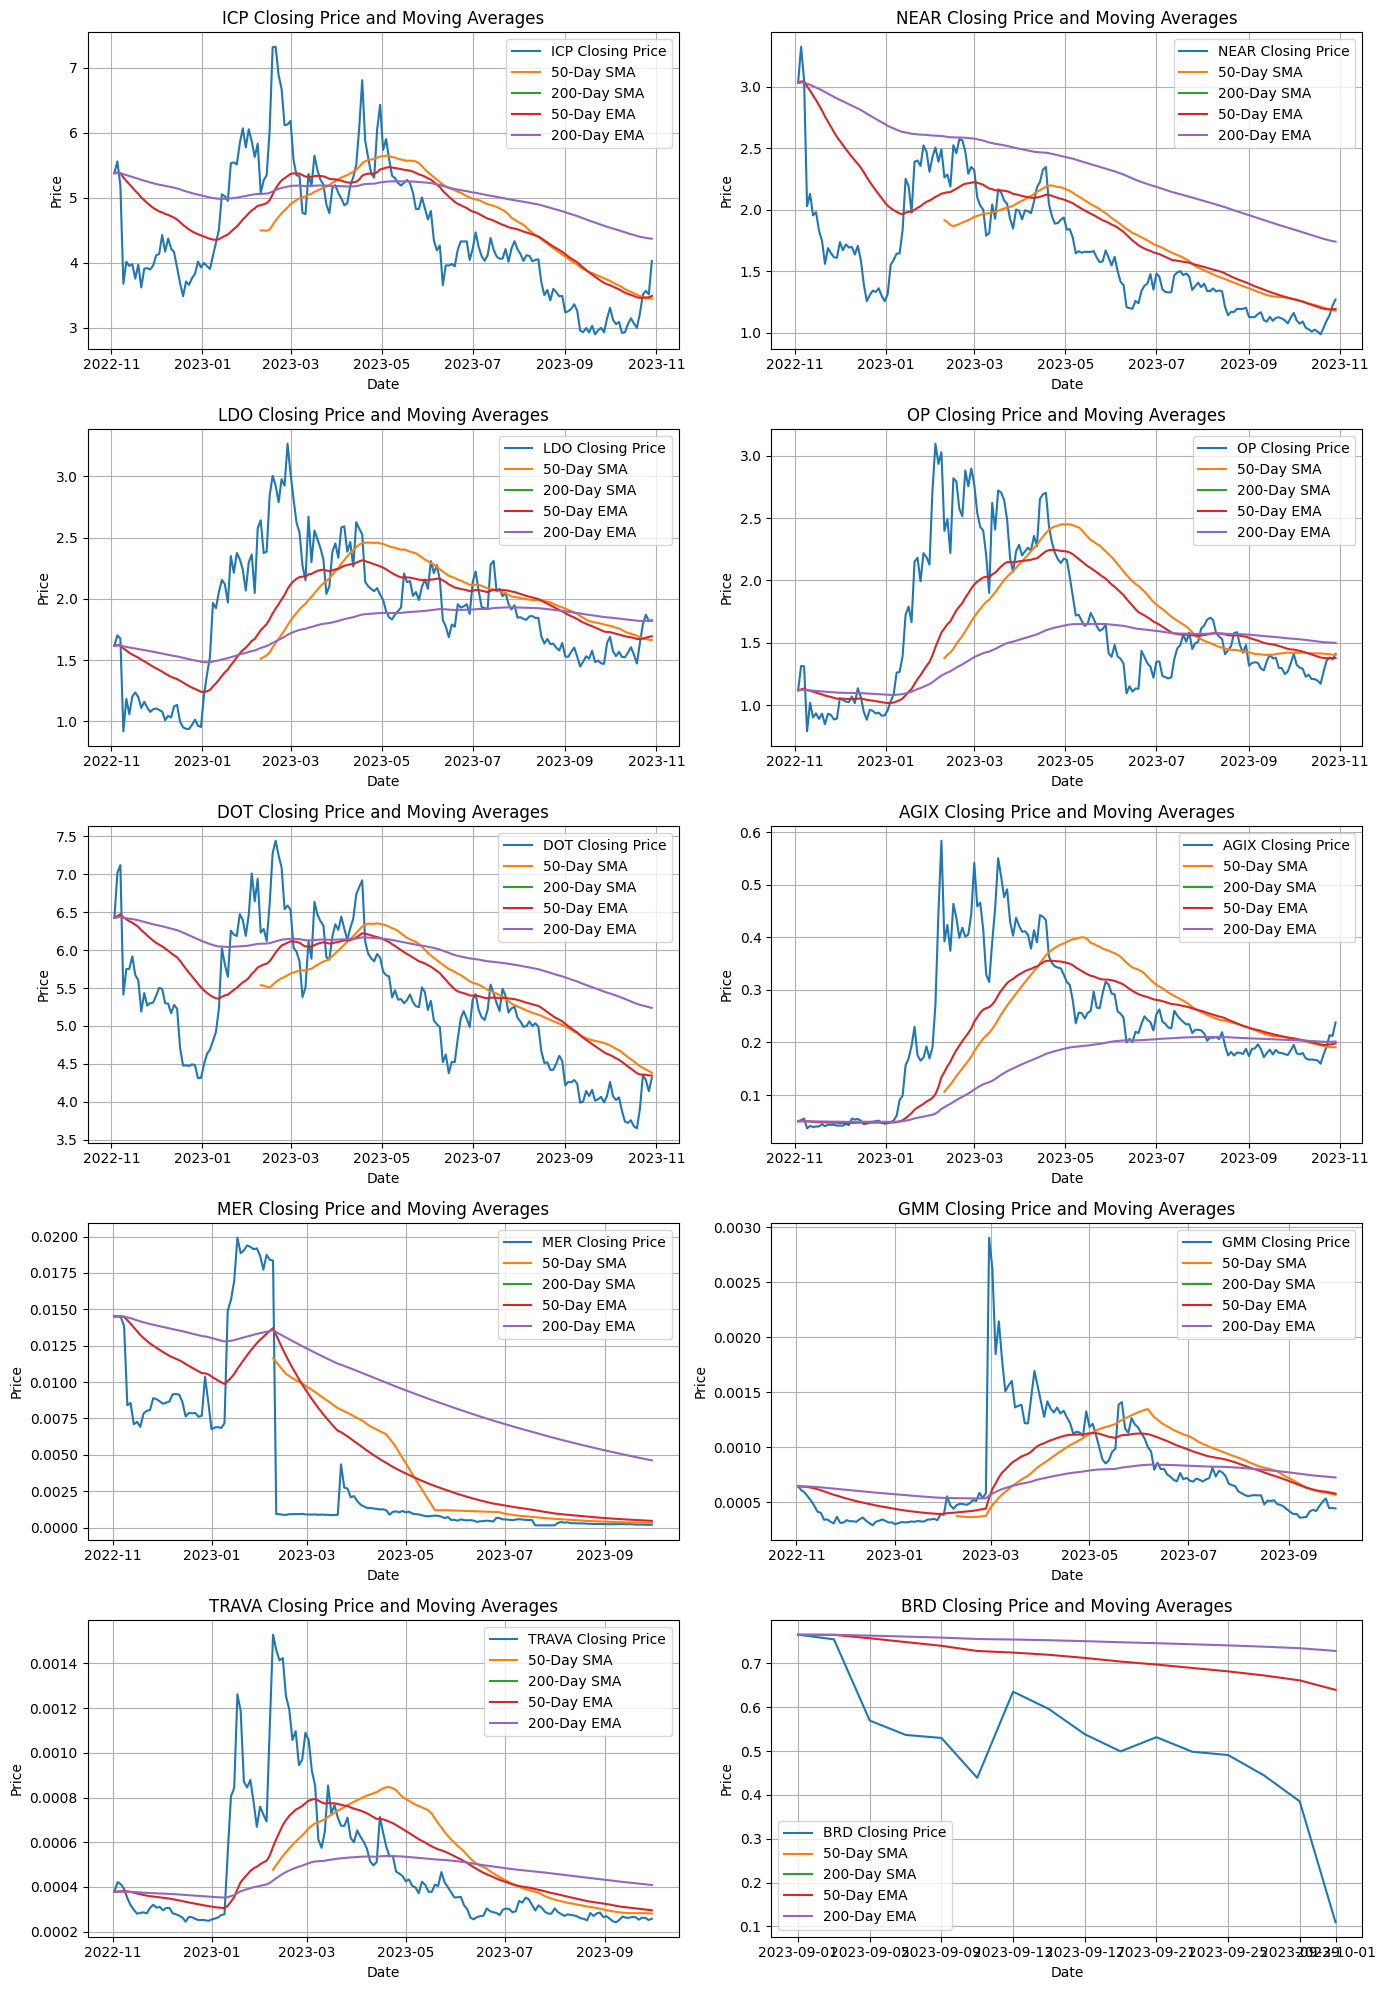

In [ ]:
# Plotting the closing prices and moving averages for the selected tickers

# We will create subplots for each of the selected tickers
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten the array for easy iteration

for i, ticker in enumerate(np.concatenate((random_top_market_cap_tickers, random_top_volatile_tickers))):
    # Extract the specific ticker data
    ticker_data = last_year_data[last_year_data['ticker'] == ticker].copy()
    ticker_data.set_index('timestamp', inplace=True)
    
    # Calculate the moving averages
    ticker_data['SMA_50'] = ticker_data['close'].rolling(window=50).mean()
    ticker_data['SMA_200'] = ticker_data['close'].rolling(window=200).mean()
    ticker_data['EMA_50'] = ticker_data['close'].ewm(span=50, adjust=False).mean()
    ticker_data['EMA_200'] = ticker_data['close'].ewm(span=200, adjust=False).mean()
    
    # Plot
    axes[i].plot(ticker_data['close'], label=f'{ticker} Closing Price')
    axes[i].plot(ticker_data['SMA_50'], label='50-Day SMA')
    axes[i].plot(ticker_data['SMA_200'], label='200-Day SMA')
    axes[i].plot(ticker_data['EMA_50'], label='50-Day EMA')
    axes[i].plot(ticker_data['EMA_200'], label='200-Day EMA')
    axes[i].set_title(f'{ticker} Closing Price and Moving Averages')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
